In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas

In [19]:
#Variaveis estaticas

#Temperaturas do ambiente, recipiente e do cafe, respectivamente, em ºC
Ta = 24
Tc = 96
Tr = 24

#Dimensões da caneca, r (raio interno), R (raio externo), rc(raio intermediario) e h(altura) em metros:
r = 0.04
R = 0.05
rc = (r + R) / 2
h = 0.1

#Massa do cafe e do recipiente em gramas, respectivamente:
mc = 250
mr = 200

#Calores especificos do cafe e do recipiente, em caloria/(grama*celsius)
cc = 1.1
cr = 0.16

#Condutividade termica do material da caneca em W/m⋅𝐾, veja: W/m⋅𝐾 é equivalente a W/m⋅C
K = 0.8

#coeficiente de convecção do ar em 𝑊/(𝑚^2⋅𝐾)
hs = 24




In [20]:
def modelo(l, t):
    Tc = l[0]
    Tr = l[1]
    Ti = Tc
    
    qs = (Tc - Ta) / (1 / (hs * math.pi * r ** 2))
    qr = (Tc - Tr) / ((math.log(rc / r))/ (K * 2 * math.pi * h))
    qf = (Ti - Ta) / ((math.log(R/rc) / (K * 2 * math.pi * h)) + (1 / (hs * 2 * math.pi * R * h)))
    dTcdt = (-1 / (mc * cc)) * (qs + qr)
    dTrdt = (1 / (mr * cr)) * (qr - qf)
    return [dTcdt, dTrdt]
    

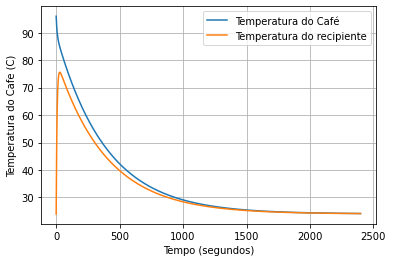

In [21]:
lista_tempo = np.arange(0, 2400, 2)
ci = [Tc, Tr]

x = odeint(modelo, ci, lista_tempo)
tCafe = x[:,0]
tRecipiente = x[:,1]

plt.plot(lista_tempo, tCafe, label='Temperatura do Café')
plt.plot(lista_tempo, tRecipiente, label='Temperatura do recipiente')
plt.legend()
plt.xlabel("Tempo (segundos)")
plt.ylabel("Temperatura do Cafe (C)")
plt.grid(True)
plt.show()

In [22]:
def modelo2(l, t, K):
    Tc = l[0]
    Tr = l[1]
    Ti = Tr
    
    qs = (Tc - Ta) / (1 / (hs * math.pi * r ** 2))
    qr = (Tc - Tr) / ((math.log(rc / r))/ (K * 2 * math.pi * h))
    qf = (Ti - Ta) / ((math.log(R/rc) / (K * 2 * math.pi * h)) + (1 / (hs * 2 * math.pi * R * h)))
    dTcdt = (-1 / (mc * cc)) * (qs + qr)
    dTrdt = (1 / (mr * cr)) * (qr - qf)
    return [dTcdt, dTrdt]

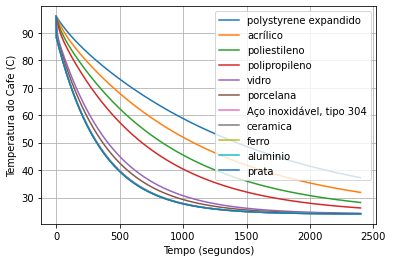

In [23]:
dic_material = {}
#https://www.sciencedirect.com/topics/engineering/thermal-conductivity-coefficient
#http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/thrcn.html ==> lista mais usada
#https://www.engineeringtoolbox.com/thermal-conductivity-d_429.html
#https://www.engineersedge.com/heat_transfer/thermal_properties_of_nonmetals_13967.htm
dic_material['polystyrene expandido'] = 0.03
dic_material['acrílico'] = 0.06
dic_material['poliestileno'] = 0.106
dic_material['polipropileno'] = 0.17
dic_material['vidro'] = 0.80
dic_material['porcelana'] = 1.5
dic_material['Aço inoxidável, tipo 304'] = 14.4
dic_material['ceramica'] = 28.0
# https://precision-ceramics.com/thermally-conductive-ceramics/ ==> ceramica
dic_material['ferro'] = 79.5
dic_material['aluminio'] = 205.0
dic_material['prata'] = 406.0

for material, i in dic_material.items():
    x = odeint(modelo2, ci, lista_tempo, args=(i,))
    tcafe = x[:,0]
    plt.plot(lista_tempo, tcafe, label = material)

plt.legend()
plt.xlabel("Tempo (segundos)")
plt.ylabel("Temperatura do Cafe (C)")
plt.grid(True)
plt.show()

In [24]:
def conclusivo(lo, lt):
    temp = 60
    
    lista_tcafe = list(lo)
    lista_tempo = list(lt)
    index = int()
    
    for i in lista_tcafe:
        if i <= temp:
            index = lista_tcafe.index(i)
            break
    return lista_tempo[index]

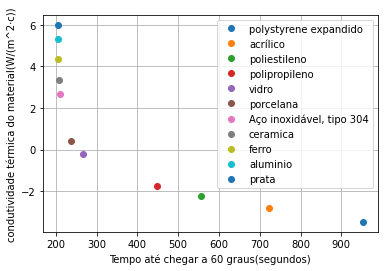

In [25]:
for material, i in dic_material.items():
        x = odeint(modelo2, ci, lista_tempo, args=(i,))
        tcafe = x[:,0]
        tempo60 = conclusivo(tcafe,lista_tempo)
        plt.plot(tempo60,math.log(i),'o', label = material)

plt.legend()
plt.xlabel("Tempo até chegar a 60 graus(segundos)")
plt.ylabel("condutividade térmica do material(W/(m^2⋅c))")
plt.grid(True)
plt.show()